# Chapter 7: The Variation Theorem
Prof. Eugene DePrince, Florida State University

The preceding notebooks have considered analytically solvable model problems that culminated in the hydrogenic atom problem. For other, more complicated problems, it will not be possible, in general, to find exact analytic solutions to the time-independent Schrödinger equation. As such, this notebook describes one strategy to find approximate solutions to the Schrödinger equation using the variation theorem. 

## The Variation Theorem for Ground States

Consider a system with a time-independent Hamiltonian, $\hat{H},$ and energy, $E_1$. The variation theorem states that, if $\phi$ is any well-behaved function that satisfies the boundary conditions for the system, then the expectation value of $\hat{H}$ with respect to $\phi$ is guaranteed to be an upper-bound to $E_1,$ i.e.,

$$\begin{align}
\frac{\langle \phi | \hat{H} | \phi\rangle}{\langle \phi| \phi\rangle} \ge E_1
\end{align}$$

If $\phi$ is normalized, then we have

$$\begin{align}
\langle \phi | \hat{H} | \phi\rangle \ge E_1
\end{align}$$

**Proof**. Let us expand $\phi$ in the basis of eigenfunctions of $\hat{H},$ which form a complete set, which we can choose to be orthonormal. We have

$$\begin{align}
|\phi\rangle = \sum_k c_k |\psi_k\rangle
\end{align}$$

where

$$\begin{align}
\hat{H} | \psi_k \rangle = E_k | \psi_k \rangle
\end{align}$$

$\phi$ is chosen to be normalized, which leads to 

$$\begin{align}
\langle \phi | \phi \rangle = \sum_k |c_k|^2 = 1
\end{align}$$

We take the expectation value of $\hat{H}$ with respect to $\phi,$ which we will call $W$

$$\begin{align}
W &= \langle \phi | \hat{H} | \phi \rangle \\
&= \sum_{kl} c_k^* c_l \langle \psi_k | \hat{H} | \psi_l \rangle \\
&= \sum_{kl} c_k^* c_l E_l \langle \psi_k | \psi_l \rangle \\
&= \sum_{kl} c_k^* c_l E_l \delta_{kl} \\
&= \sum_k |c_k|^2 E_k
\end{align}$$

Now, by definition, $E_k \ge E_1$ for all $k$ because $E_1$ is the ground-state energy. As a result, we can state that

$$\begin{align}
|c_k|^2 E_k \ge |c_k|^2 E_1
\end{align}$$

Combining this result with the expectation value evaluated above leads to 

$$\begin{align}
W &= \sum_k |c_k|^2 E_k \\
  &\ge \sum_k |c_k|^2 E_1 = E_1
\end{align}$$

Therefore,

$$\begin{align}
W = \langle \phi | \hat{H} | \phi \rangle \ge E_1
\end{align}$$

This result has important consequences for finding approximate solutions to the Schrödinger equation. First, we could simply test a set of trial functions to see which one is the "best" in the sense that it gives the lowest energy (the closest to $E_1$). Alternatively, we could choose a single trial function that contains parameters, and the best set of parameters could be chosen by varying them such that they minimize the expectation value of the Hamiltonian. In either case, we need to start with a good trial function.

As an example, consider the one-dimensional particle-in-a-box (PIB) problem. We have a potential defined by

$$\begin{align}
V(x) = \begin{cases}
\infty\text{, } &x < 0 \\
0\text{, } & 0 \le x \le L \\
\infty\text{, } & x \ge L 
\end{cases}
\end{align}$$

As such, we know that the boundary conditions for the problem require that the wave function go to zero at the edges of the box. The following trial wave function satisfies these conditions

$$\begin{align}
\phi(x) = \begin{cases}
0\text{, } &x < 0 \\
N x(L-x)\text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$

where $N$ is a normalization coefficient. The following Python code visualizes this trial function alongside the actual ground-state wave function for the PIB problem

$$\begin{align}
\psi_1(x) = \begin{cases}
0\text{, } &x < 0 \\
\left (\frac{2}{L} \right ) ^{1/2}\sin\left (\frac{\pi x}{L}\right )\text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$

The code also evaluates the expecation value of the Hamiltonian with respect to $\phi,$ which, according to the variation theorem, should be greater than or equal to the exact ground-state energy for the PIB problem. To simplify matters, we will work in atomic units. We choose the mass of the particle to be that of an electron ($m = m_\text{e} = 1$), and the length of the box to be $L = 1 a_0$. Because

$$\begin{align}
\langle \phi | \hat{H} | \phi \rangle = -\frac{\hbar^2}{2m}  \left \langle \phi \left | \frac{d^2}{dx^2}\right | \phi \right \rangle
\end{align}$$

we will also need to know the second derivative of $\phi$ with respect to $x$

$$\begin{align}
\frac{d^2}{dx^2} \phi(x) &= \frac{d^2}{dx^2} N x(L-x) \\
&= \frac{d}{dx} N(L - 2x) \\
&= -2N
\end{align}$$

The code below will also normalize $\phi(x),$ so we need to remember to include the normalization constant in this derivative expression.

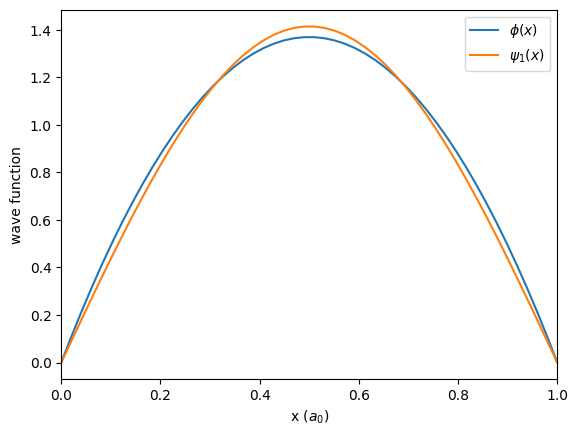

W =    4.99792 Eh


In [1]:
import numpy as np
import matplotlib.pyplot as plt

L = 1

x = np.linspace(0, L)
phi = x * (L-x)
psi_1 = np.sqrt(2.0 / L) * np.sin(np.pi * x / L)

# normalize phi 
# phi -> N * phi
# N = 1/sqrt(<phi|phi>)
N = 1.0 / np.sqrt(np.trapz(phi**2, x))
phi *= N

fig = plt.figure()

plt.xlim(0, L)
plt.xlabel(r'x ($a_0$)')
plt.ylabel(r'wave function')

plt.plot(x, phi, label = r'$\phi(x)$')
plt.plot(x, psi_1, label = r'$\psi_1(x)$')
plt.legend()
plt.show()

# evaluate <phi|H|phi> = -1/2<phi|d^2/dx^2|phi> = <phi|N>
W = N * np.trapz(phi, x)

print('W = %10.5f Eh' % (W / np.trapz(phi**2, x)))


How does this result compare to the true ground-state energy for the PIB problem? Recall

$$\begin{align}
E_n = \frac{\hbar^2n^2\pi^2}{2mL^2} 
\end{align}$$

so 

$$\begin{align}
E_1 =  \frac{\pi^2}{2} {\rm E}_h \approx 4.93480 ~{\rm E}_h
\end{align}$$

Sure enough, the average energy associated with the trial wave function is higher than the exact ground-state energy, by about 1.3\%.

> Practice
>
> > Question 1
> >
> > Verify the results above by evaluating the expectation value of the Hamiltonian with respect to $\phi$ analytically, rather than numerically.

How could this result be improved? As mentioned above, we could choose a trial function that contains parameters and vary these parameters such that they minimize the variational integral, $W$. Let us consider the following trial function

$$\begin{align}
\phi(x) = c_1 \phi_1(x) + c_2 \phi_2(x)
\end{align}$$

where the basis functions, $\phi_1$ and $\phi_2,$ are both functions that satisfy the boundary conditions for the problem, i.e.,

$$\begin{align}
\phi_1(x) &= N_1 x(L-x) \\
\phi_2(x) &= N_2 x^2(L-x)^2
\end{align}$$

when $0 \le x \le L,$ and both functions are zero elsewhere. Here, $N_1$ and $N_2$ are normalization constants for the basis functions. As will be discussed below, the problem of finding the optimal expansion coefficients $c_1$ and $c_2$ can actually be expressed as a matrix eigenvalue problem, but, for now, let us determine these coefficients by direct numerical minimization in Python. As above, we will work in atomic units and choose $m = m_\text{e}$ and $L = 1a_0$. Also like above, we will need to evaluate an integral involving the second derivatives of $\phi_1$ (which we determined above) and $\phi_2$ 

$$\begin{align}
\frac{d^2}{dx^2} \phi_2 &= N_2 \frac{d^2}{dx^2} x^2 (L-x)^2 \\
&= N_2 \frac{d}{dx}\left [ 2x(L-x)^2 - 2x^2(L-x)\right ] \\
&= N_2  \left [ 2(L-x)^2 - 8x(L-x) + 2x^2 L \right ]
\end{align}$$

So, we will write a function that evaluates

$$\begin{align}
W = \frac{\langle \phi | \hat{H} \phi \rangle}{\langle \phi |\phi \rangle}
\end{align}$$

and use a Python library function to minimize $W$ with respect to $c_1$ and $c_2.$ For the numerator, we have

$$\begin{align}
\langle \phi | \hat{H} \phi \rangle &= -\frac{1}{2} \left ( c_1^2 \langle \phi_1 | \phi_1^{\prime\prime}\rangle  + c_1c_2 [ \langle \phi_1 | \phi_2^{\prime\prime}\rangle + \langle \phi_2 | \phi_1^{\prime\prime}\rangle ] + c_2^2 \langle \phi_2 | \phi_2^{\prime\prime}\rangle \right)
\end{align}$$

and, for the denominator, we have

$$\begin{align}
\langle \phi |\phi \rangle &=   c_1^2 \langle \phi_1 | \phi_1 \rangle  + 2 c_1c_2 \langle \phi_1 | \phi_2\rangle  + c_2^2 \langle \phi_2 | \phi_2 \rangle 
\end{align}$$

where, in both expressions, we have assumed that $c_1$ and $c_2$ are real valued.

In [2]:
def evaluate_w(var, H11, H12, H22, S12):
    """
    evaluate the variational integral W = <phi|H|phi>/<phi|phi>

    :param var: the parameters, c1 and c2
    :param H11: <phi_1 | H | phi_1>
    :param H12: <phi_1 | H | phi_2>
    :param H22: <phi_2 | H | phi_2>
    :param S12: <phi_1 | phi_1>
    :return W: the variational integral
    """

    c1, c2 = var

    numerator = c1**2 * H11 + 2 * c1*c2 * H12 + c2**2 * H22
    denominator = c1**2 + 2 * S12 * c1*c2 + c2**2
    
    W = numerator / denominator
                
    return W
    
# minimize W
from scipy.optimize import minimize

L = 1.0

# use a fine-grain grid to be sure numerical integrals are accurate
x = np.linspace(0, L, 5001)

# normalization constant
phi_1 = x * (L-x)
N1 = 1.0 / np.sqrt(np.trapz(phi_1**2, x))
phi_1 *= N1

# second derivative
phi_1pp = -2 * N1

# normalization constant
phi_2 = x**2 * (L-x)**2
N2 = 1.0 / np.sqrt(np.trapz(phi_2**2, x))
phi_2 *= N2

# second derivative
phi_2pp = N2 * ( 2 * (L-x)**2 - 8 * x * (L-x) + 2 * x**2 * L )

# <phi1|H|phi1>
H11 = -0.5 * np.trapz(phi_1 * phi_1pp, x)
    
# <phi1|H|phi2>
# <phi2|H|phi1> = <phi1|H|phi2>* because H is Hermitian
H12 = -0.5 * np.trapz(phi_1 * phi_2pp, x)

 # <phi2|H|phi2>
H22 = -0.5 * np.trapz(phi_2 * phi_2pp, x)

# S11 = <phi_1|phi_1> = 1 because phi_1 is normalized
# S22 = <phi_2|phi_2> = 1 because phi_2 is normalized
# S12 = S21 = <phi_1 | phi_2>
S12 = np.trapz(phi_1 * phi_2, x)
    
res = minimize(evaluate_w, [1, 1], args=(H11, H12, H22, S12) )

c1 = res.x[0]
c2 = res.x[1]
w = evaluate_w([c1, c2], H11, H12, H22, S12)
print("c1 = %10.5f" % (res.x[0]))
print("c2 = %10.5f" % (res.x[1]))
print("w  = %10.5f Eh" % (w))


c1 =    1.50478
c2 =    0.37209
w  =    4.93487 Eh


Wow! The variational integral, $W,$ shows only a 0.001\% error relative to the exact ground-state energy for the PIB problem, 4.93480 $E_\text{h}$! Now, let's normalize $\phi$ and visualize it relative to the exact ground-state wave function.

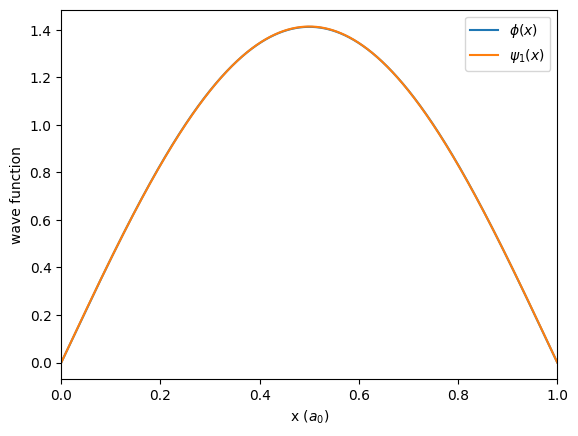

In [3]:
psi_1 = np.sqrt(2.0 / L) * np.sin(np.pi * x / L)

fig = plt.figure()

plt.xlim(0, L)
plt.xlabel(r'x ($a_0$)')
plt.ylabel(r'wave function')

# normalize phi
N = 1.0 / np.sqrt(c1**2 + c2**2 + 2 * S12 * c1 * c2)
phi = N * (c1 * phi_1 + c2 * phi_2)
plt.plot(x, phi, label = r'$\phi(x)$')

plt.plot(x, psi_1, label = r'$\psi_1(x)$')
plt.legend()
plt.show()


We can see that the approximate wave function, $\phi,$ is indistinguishable from $\psi_1$ on the scale of this figure.

Before moving on, let us consider one more example of a trial function that contains a variable parameter. Recall the one-dimensional quantum harmonic oscillator (QHO) problem. The QHO potential has the form

$$\begin{align}
V(x) = 2 \pi^2 \nu^2 m x^2
\end{align}$$

where $m$ is the mass of the oscillator, and $\nu$ is the frequency at which it oscillates. What boundary conditions should a trial wave function for this problem satisfy? Because

$$\begin{align}
\lim_{x \to \pm \infty} V(x) = \infty
\end{align}$$

we know that the wave function should go to zero in these limits. As such, we should pick a trial function that satisfies this requirement. We choose

$$\begin{align}
\phi(x) = e^{-c x^2}
\end{align}$$

where $c$ is a variable parameter that is related to how quickly the wave function decays to zero. For this example, let us determine the optimal parameter analytically, rather than numerically. The optimal value for $c$ should satisfy

$$\begin{align}
\frac{d}{dc} W = \frac{d}{dc} \frac{\langle \phi | \hat{H} | \phi \rangle}{\langle \phi | \phi \rangle } = 0
\end{align}$$

For the numerator of the variational integral, we have

$$\begin{align}
\langle \phi | \hat{H} | \phi \rangle &= -\frac{\hbar^2}{2m} \int_{-\infty}^\infty e^{-cx^2} \frac{d^2}{dx^2} e^{-cx^2} dx + 2\pi^2\nu^2 m \int_{-\infty}^{\infty} x^2 e^{-2cx^2} dx \\
&= \left ( \frac{\hbar^2}{m} \right ) \left ( \frac{\pi}{8} \right )^{1/2} c^{1/2} + \nu^2 m\left ( \frac{\pi^5}{8} \right )^{1/2} c^{-3/2}
\end{align}$$

The denominator of the variational integral is

$$\begin{align}
\langle \phi | \phi \rangle &= \int_{-\infty}^\infty e^{-2cx^2} dx \\
&= \left ( \frac{\pi}{2} \right )^{1/2} c^{-1/2}
\end{align}$$


Combining these results,

$$\begin{align}
W &= \frac{\langle \phi | \hat{H} \phi \rangle}{\langle \phi | \phi \rangle } \\
&= \frac{\hbar^2}{2m} c + \frac{\pi^2}{2} \nu^2 m c^{-1}
\end{align}$$

and

$$\begin{align}
\frac{d}{dc} W = \frac{\hbar^2}{2m} - \frac{\pi^2}{2} \nu^2 m c^{-2} = 0
\end{align}$$

Solving for $c,$ we obtain

$$\begin{align}
c = \pm \left ( \frac{\pi m \nu}{\hbar} \right )
\end{align}$$

and we reject the solution with the minus sign because 

$$\begin{align}
\phi(x) = e^{+\pi\nu m x^2/\hbar}
\end{align}$$

is not a square integrable function. So, the approximate wave function is

$$\begin{align}
\phi(x) = e^{-m\pi\nu x^2/\hbar}
\end{align}$$

and, the variational integral is

$$\begin{align}
W &= \frac{\hbar^2}{2m} c + \frac{\pi^2}{2} \nu^2 m c^{-1} \\
&= \frac{\hbar^2}{2m} \frac{\pi m \nu}{\hbar}  + \frac{\pi^2}{2} \nu^2 m \frac{\hbar} {\pi m \nu} \\
&= \frac{1}{2} h\nu
\end{align}$$

which is exactly equal to the ground-state energy for the one-dimensional QHO! Clearly, we chose an excellent trial function because the optimal variational parameter led to exactly the correct ground-state energy and wave function.

## The Variation Theorem for Excited States

As expressed above, the variation theorem appears to be useful only for approximating the wave function for the lowest-energy eigenfunction of a given Hamiltonian. However, it is possible to extend this theorem to excited states. We proceed in the same manner as before, by expanding the trial function, $\phi,$ in the basis of eigen state of the Hamiltonian. We have

$$\begin{align}
|\phi\rangle = \sum_k c_k |\psi_k\rangle
\end{align}$$

where

$$\begin{align}
\hat{H} | \psi_k \rangle = E_k | \psi_k \rangle
\end{align}$$

and, again, we choose $\{\psi_k\}$ to be an orthonormal set, and we also choose $\phi$ to be normalized, so

$$\begin{align}
\langle \phi | \phi \rangle = \sum_k |c_k|^2 = 1
\end{align}$$

What happens if $\phi$ is orthogonal to the true ground-state wave function? In that case, we have

$$\begin{align}
\langle \phi | \psi_1 \rangle &= 0 \\
&= \sum c_k^* \langle \psi_k | \phi_1 \rangle \\
&= c_1^*
\end{align}$$

So, if $\langle \phi | \psi_1 \rangle = 0,$ then the expansion coefficient corresponding to that basis function is zero. As a result, we can restrict the sum that defines $\phi$ as 

$$\begin{align}
|\phi\rangle = \sum_{k=2} c_k |\psi_k\rangle
\end{align}$$

Working through the expectation value of the Hamiltonian, we would find that the variational integral would then be

$$\begin{align}
W = \sum_{k=2} |c_k|^2 E_k
\end{align}$$

and, because all $E_k$ in that sum satisfy $E_k \ge E_2,$ we find 

$$\begin{align}
W \ge E_2
\end{align}$$

This analysis suggests that, if we can guarantee that $\langle \phi | \psi_1 \rangle = 0,$ then we can use the variation theorem to find approximations to excited-state energies and wave functions. Without knowledge of the actual form of the ground-state wave function, enforcing the orthogonality requirement might seem like a tall order. However, in many cases, we can rely on symmetry arguments to make our lives easier. Consider the following examples.

**Case 1**. First, recall that, in the one-dimensional PIB problem, the wave functions with alternate even or odd symmetry about the center of the box. The ground-state wave function has even symmetry (which is actually the case for any problem for which the potential has even symmetry), so the first excited-state wave function must have odd symmetry. A suitable trial function would be 

$$\begin{align}
\phi(x) = \begin{cases}
0\text{, } &x < 0 \\
N x(L-x)(L/2 - x) \text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$

where $N$ is a normalization constant. The following code visualizes this trial function and the true wave function for the first excited-state (with $n=2$) of the PIB problem. Again, we work with atomic units and choose $L = 1a_0$.

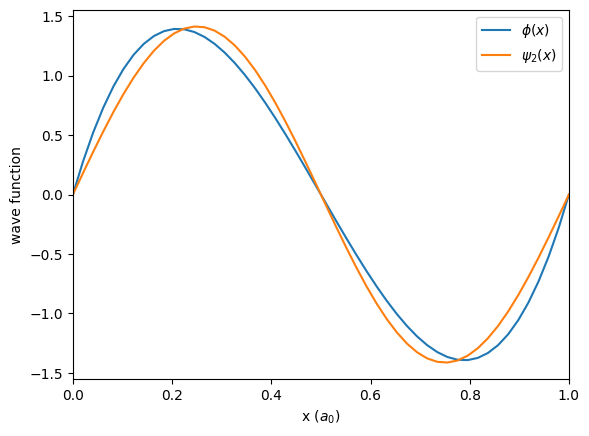

In [4]:
import numpy as np
import matplotlib.pyplot as plt

L = 1

x = np.linspace(0, L)
phi = x * (L-x) * (L/2 - x)
psi_2 = np.sqrt(2.0 / L) * np.sin(2 * np.pi * x / L)

# normalize phi 
# phi -> N * phi
# N = 1/sqrt(<phi|phi>)
N = 1.0 / np.sqrt(np.trapz(phi**2, x))
phi *= N

fig = plt.figure()

plt.xlim(0, L)
plt.xlabel(r'x ($a_0$)')
plt.ylabel(r'wave function')

plt.plot(x, phi, label = r'$\phi(x)$')
plt.plot(x, psi_2, label = r'$\psi_2(x)$')
plt.legend()
plt.show()

As can be seen, this trial function seems like it will be a reasonable approximation to the true wave function for the $n=2$ state. 

> Practice
>
> > Question 2
> >
> > Consider the trial function
> > $$\begin{align}
\phi(x) = \begin{cases}
0\text{, } &x < 0 \\
N x(L-x)(L/2 - x) \text{, } &0 \le x \le L \\
0\text{, }&x \ge L 
\end{cases}
\end{align}$$
> > Evaluate the expecation value of the one-dimensional PIB Hamiltonian with respect to this function numerically and analytically, and show that this expectation value is an upper bound to the true energy of the $n=2$ state for the PIB problem.

**Case 2**. As a second example, let's revisit the one-dimensional QHO problem. Above, we found that the exact form of the ground-state wave function could be obtained from the trial function, 

$$\begin{align}
\phi(x) = e^{-cx^2}
\end{align}$$

Recall that, like the PIB problem, the QHO wave functions for different states alternate between even and odd symmetry. The ground-state has even symmetry, so, if we would like to approximate the first-excited state, we should choose a trial function that has odd symmetry. Consider

$$\begin{align}
\phi(x) = x e^{-cx^2}
\end{align}$$

It turns out that this is also an excellent choice for a trial function, because the optimal value for $c$ will recover the exact energy and wave function for the $v=1$ state!

> Practice
>
> > Question 3
> >
> > Show that the trial function
> >
> > $$\begin{align}
\phi(x) = x e^{-cx^2}
\end{align}$$
> >
> > will recover the exact energy for the first excited state of the one-dimensional QHO problem.
> >

**Case 3**. The hydrogenic atom problem is a central force problem, and all central force problems have solutions of the form

$$\begin{align}
\psi(r, \theta, \phi) &= R(r) Y^m_l(\theta, \phi)
\end{align}$$

where $Y^m_l(\theta, \phi)$ are the spherical harmonics. Recall that the spherical harmonics with different $l$ values are orthogonal, i.e.,

$$\begin{align}
\langle Y^m_l(\theta, \phi) | Y^m_{l^\prime}(\theta, \phi) \rangle = 0\text{, }~~~l \neq l^\prime
\end{align}$$

One could choose as trial functions

$$\begin{align}
\phi_1(r, \theta, \phi) &= R(r) Y^0_0(\theta, \phi) \\
\phi_2(r, \theta, \phi) &= R(r) Y^0_1(\theta, \phi) \\
\phi_3(r, \theta, \phi) &= R(r) Y^0_2(\theta, \phi) \\
\text{etc.}  \nonumber
\end{align}$$

where $R(r)$ is an as-of-yet undetermined function that contains the variational parameters and should satisfy the boundary conditions for bound states

$$\begin{align}
\lim_{r\to\infty} R(r) = 0
\end{align}$$

The trial function $\phi_1$ could be used to find an approximate radial function and energy for the lowest-energy state with $l=0,$ which would be the $n=1$ state. The trial functions $\phi_2,$ $\phi_3,$ etc., could then be used to find approximate radial functions and energies for the lowest-energy states with $l=1, 2,$ etc. (the $n=2, 3,$ etc. states).

**Case 4**. In a later notebook, we will discuss [Hartree-Fock theory](https://deprincelab.github.io/tutorials/jupyter_notebooks/hartree_fock/hartree_fock.html), which is a variational approach for finding approximate wave functions for many-electron systems. In the Hartree-Fock approach, the trial wave function is chosen to be an antisymmetrized product of "spin-orbitals," which are one-electron wave functions that include both spin and spatial coordinates. As an example, for two electrons, such a wave function would look like

$$\begin{align}
\phi({\bf x}_1, {\bf x_2}) = \frac{1}{\sqrt{2}} [ \chi_1({\bf x}_1) \chi_2({\bf x}_2) - \chi_1({\bf x}_2) \chi_2({\bf x}_1)]
\end{align}$$

where ${\bf x}_1$ and ${\bf x}_2$ represent the spin and spatial coordinates for electrons 1 and 2, respectively, and $\chi_1$ and $\chi_2$ are the spin-orbitals that contains the variational parameters. For molecules having point-group symmetry beyond $\text{C}_1,$ the spin-orbitals can be defined such that they belong to a specific irreducible representation of the point-group. States of different total symmetry can then be constructed where the overall symmetry is defined by the products of the symmetries of the underlying spin-orbitals. Consider a water molecule, which belongs to the C$_{2v}$ point group, which itself has four irreducible representations ($A_1,$ $A_2,$ $B_1,$ and $B_2$). As such, the Hatree-Fock approach could be used to find wave functions and energies approximating those for the four lowest-energy states with each of these overall symmetries. 

**Case 5**. Lastly, consider again the antisymmetrized product wave function from Hartree-Fock theory. The spin degrees of freedom could be chosen such that the trial wave function has a specific spin symmetry (e.g., singlet, triplet, etc.). In this way, the Hartree-Fock approach could be used to find wave functions and energies approximating those for the lowest-energy states of a given spin symmetry. 

## The Linear Variation Method

One of the main challenges in applications of the variation theorem is choosing a good trial function. On the one hand, we could simply inspect the boundary conditions and choose an appropriate form that respects those conditions (as we did above for the PIB and QHO problems). A more systematic approach is to expand the wave function in a basis of known functions and let the expansion coefficients be the variational parameters. We touched on this idea above when considering the PIB problem. In that case, we chose a trial function that contained two basis functions, 

$$\begin{align}
\phi(x) = c_1 \phi_1(x) + c_2 \phi_2(x)
\end{align}$$

and we found the optimal coefficients numerically using a Python minimization routine. It turns out that we could have also solved this problem analytically using a formalism that involves some linear algebra. Before doing so, we should review some relevant mathematical concepts. 

### Matrices in Quantum Mechanics

Given a set $n$ of orthonormal basis functions, $\{f_i\},$ we can define the **matrix representation** of an operator, $\hat{A},$ as

$$\begin{align}
{\bf A} = \begin{pmatrix}
A_{11} & A_{12} & ... \\
A_{21} & \ddots &  \\
\vdots & & A_{nn}\\
\end{pmatrix}
\end{align}$$

where each **matrix element** is defined by

$$\begin{align}
A_{ij} = \langle f_i | \hat{A} | f_j \rangle
\end{align}$$

We will find that matrices have the same mathematical properties as linear Hermitian operators that we discussed in an earlier notebook. Consider first the equivalence of the matrix representation of two operators

$$\begin{align}
\hat{R} = \hat{S}
\end{align}$$

in the basis $\{f_i\}$. We multiply this expression by $\langle f_i|$ on the left and by $|f_j\rangle$ on the right and then integrate over all space to obtain

$$\begin{align}
R_{ij} = S_{ij}
\end{align}$$

From this expression, we conclude that the matrix representations of $\hat{R}$ and $\hat{S}$ are equal if the matrix elements are equivalent, for all $i$ and $j$.

Now, consider the addition of two operators

$$\begin{align}
\hat{C} = \hat{A} + \hat{B}
\end{align}$$

We can evaluate the matrix elements for $\hat{C}$ in the basis $\{f_i\}$ as

$$\begin{align}
C_{ij} &= \langle f_i |\hat{C} | f_j \rangle \\
&= \langle f_i |\hat{A} + \hat{B} | f_j \rangle \\
&= \langle f_i |\hat{A} | f_j \rangle + \langle f_i | \hat{B} | f_j \rangle \\
&= A_{ij} + B_{ij}
\end{align}$$

which is the rule for matrix addition! 

Let us try something slightly more complicated. Consider the product of operators

$$\begin{align}
\hat{R} = \hat{S}\hat{T}
\end{align}$$

The matrix representation of this product is 

$$\begin{align}
R_{ij} &= \langle f_i | \hat{R} | f_j \rangle \\
&= \langle f_i |\hat{S}\hat{T} | f_j \rangle
\end{align}$$

If the basis $\{f_i\}$ is complete, then we can expand 

$$\begin{align}
\hat{T} | f_j \rangle = \sum_k c_k | f_k \rangle
\end{align}$$

so 

$$\begin{align}
R_{ij} &= \sum_k c_k \langle f_i |\hat{S} | f_k \rangle \\
&= \sum_k c_k S_{ik}
\end{align}$$

How can we determine the expansion coefficients? You may recall from an earlier notebook that one of the expansion coefficients, $c_m,$ can be obtained by projecting $\hat{T} | f_j \rangle = \sum_k c_k | f_k \rangle$ onto the basis function, $\langle f_m|,$ i.e.

$$\begin{align}
\langle f_m | \hat{T} | f_j \rangle &= \sum_k c_k \langle f_m | f_k \rangle \\
&= \sum_k c_k \delta_{mk} \\
&= c_m
\end{align}$$

Now, we find that

$$\begin{align}
R_{ij} &= \sum_{k} S_{ik} T_{kj}
\end{align}$$

which is the rule for matrix multiplication! We could also have obtained this result more directly, by inserting the identity operator,

$$\begin{align}
\hat{I} = \sum_k | f_k \rangle \langle f_k |
\end{align}$$

directy between the product of operators in

$$\begin{align}
R_{ij} &= \langle f_i | \hat{R} | f_j \rangle \\
&= \langle f_i |\hat{S}\hat{T} | f_j \rangle \\
&= \langle f_i |\hat{S}\hat{I}\hat{T} | f_j \rangle \\
&= \sum_k  \langle f_i | \hat{S}|f_k \rangle \langle f_k | \hat{T} | f_j \rangle \\
&= \sum_{k} S_{ik} T_{kj}
\end{align}$$



### Vectors in Quantum Mechanics

These exercises should convince us that we can view operators as matrices once we have chosen a basis. It turns out that we can also view functions expanded in this basis as **vectors**. Consider the action of the operator $\hat{A}$ on a function

$$\begin{align}
\hat{A} | u \rangle = | w \rangle
\end{align}$$

Now, we select a basis, $\{f_i\},$ in which we expand the function $|u\rangle$

$$\begin{align}
|u\rangle = \sum_i u_i | f_i \rangle
\end{align}$$

with 

$$\begin{align}
u_i = \langle f_i | u \rangle
\end{align}$$

or

$$\begin{align}
|u\rangle = \sum_i  | f_i \rangle \langle f_i | u \rangle
\end{align}$$

We can think of the expansion coefficients, $u_i,$ as being components of a vector

$$\begin{align}
{\bf u } = \begin{pmatrix}
u_1 \\
u_2 \\
\vdots \\
u_n
\end{pmatrix}
\end{align}$$

where $n$ is the dimension of the basis. Let us insert $|u\rangle = \sum_i  | f_i \rangle \langle f_i | u \rangle$ into the expression for the matrix vector product

$$\begin{align}
\sum_i  \hat{A}  | f_i \rangle \langle f_i | u \rangle = | w \rangle
\end{align}$$

Next, we can expand the function $\hat{A}  | f_i \rangle$ in the same basis

$$\begin{align}
\hat{A}  | f_i \rangle &= \sum_k c_k | f_k \rangle \\
&= \sum_k \langle f_k | \hat{A} | f_i \rangle | f_k \rangle
\end{align}$$

which gives us

$$\begin{align}
\sum_{ik} \langle f_k | \hat{A} | f_i \rangle \langle f_i | u \rangle | f_k \rangle  = | w \rangle
\end{align}$$

We now can expand the function $|w\rangle$ in the same basis to obtain

$$\begin{align}
|w\rangle &= \sum_i w_i | f_i \rangle \\
&= \sum_i |f_i \rangle \langle f_i | w\rangle
\end{align}$$

and

$$\begin{align}
\sum_{ik} \langle f_k | \hat{A} | f_i \rangle \langle f_i | u \rangle | f_k \rangle  = \sum_j |f_j \rangle \langle f_j | w\rangle
\end{align}$$

or

$$\begin{align}
\sum_{ik} A_{ki} u_i | f_k \rangle  = \sum_j w_j |f_j \rangle 
\end{align}$$

We can move all terms to the left-hand side to give

$$\begin{align}
\sum_{k}\left [ \sum_i A_{ki} u_i - w_k \right ] | f_k \rangle  = 0
\end{align}$$

At this point, we put on our linear algebra hats and note that, if $|f_k\rangle \neq 0$ and all $|f_k\rangle$ are linearly independent, then this equation only has a solution if

$$\begin{align}
\sum_i A_{ki} u_i - w_k  = 0\text{, }~~~\forall ~k
\end{align}$$ 

Put another way, 

$$\begin{align}
\sum_i A_{ki} u_i = w_k\text{, }~~~\forall ~k
\end{align}$$ 

which is the rule for a matrix-vector product!

### The Secular Equation

In the linear variational method, the trial wave function is expanded in a basis of known functions

$$\begin{align}
|\phi\rangle = \sum_k c_k |f_k\rangle
\end{align}$$

where the set of functions $\{|f_k\rangle\}$ is not necessarily orthonormalized. While not required, the following analysis will be simpler if we assume that $\{c_k\}$ and $\{|f_k\rangle\}$ are real-valued. We would like to minimize the variational integral

$$\begin{align}
W = \frac{\langle \phi | \hat{H} | \phi \rangle}{\langle \phi | \phi \rangle}
\end{align}$$

with respect to the expansion coefficients. The optimal coefficients should satisfy 

$$\begin{align}
\frac{\partial W}{\partial c_i} = 0
\end{align}$$

for all $i$. Let's do some math! We have

$$\begin{align}
\frac{\partial W}{\partial c_i} &= \frac{\partial}{\partial c_i} \langle \phi | \hat{H} | \phi \rangle \langle \phi | \phi \rangle^{-1} \\
&=  \left [ \left \langle \left . \left . \frac{ \partial \phi}{\partial c_i}\right | \hat{H} \right | \phi \right \rangle   + \left \langle \phi \left | \hat{H} \left | \frac{\partial \phi}{\partial c_i} \right . \right . \right \rangle \right ] \langle \phi | \phi \rangle^{-1} \nonumber \\
&- \langle \phi | \hat{H} | \phi \rangle \left [ \left \langle \left . \frac{ \partial \phi}{\partial c_i} \right | \phi \right \rangle  + \left \langle \phi \left | \frac{\partial \phi}{\partial c_i}\right . \right \rangle \right ] \langle \phi | \phi \rangle^{-2}
\end{align}$$

The derivative of the trial wave function with respect to $c_i$ is

$$\begin{align}
\frac{\partial}{c_i} | \phi \rangle &= \sum_k \frac{\partial}{\partial c_i} c_k | f_k \rangle \\
&= \sum_k \delta_{ik} | f_k \rangle \\
&= |f_i\rangle
\end{align}$$

so the gradient of $W$ becomes

$$\begin{align}
\frac{\partial W}{\partial c_i} &= \frac{\langle f_i | \hat{H} | \phi \rangle + \langle \phi | \hat{H} | f_i \rangle}{\langle \phi | \phi \rangle} - \frac{\langle \phi | \hat{H} | \phi \rangle}{\langle \phi |\phi\rangle^2} \left [ \langle f_i | \phi \rangle +  \langle \phi | f_i \rangle \right ]
\end{align}$$

By multiplying through by a factor of $\langle \phi | \phi \rangle$ and recognizing that $\frac{\langle \phi | \hat{H} | \phi \rangle}{\langle \phi | \phi \rangle} = W,$ this expression simplifies to

$$\begin{align}
0 &= \langle f_i | \hat{H} | \phi \rangle + \langle \phi | \hat{H} | f_i \rangle - W \left [ \langle f_i | \phi \rangle +  \langle \phi | f_i \rangle \right ] \\
&= \sum_k c_k \langle f_i | \hat{H} | f_k \rangle  + \sum_k c_k^* \langle f_k | \hat{H} | f_i \rangle  - W \left ( \sum_k c_k \langle f_i | f_k \rangle + \sum_k c_k^* \langle f_k | f_i \rangle  \right ) \\
&= \sum_k c_k \left ( H_{ik} + H_{ki} \right ) - W \sum_k c_k \left (S_{ik} + S_{ki} \right )
\end{align}$$

where, in the last line, we have recognized that $c_k$ is real valued, and we have introduced the overlap integral

$$\begin{align}
S_{ik} = \langle f_i | f_k \rangle
\end{align}$$

Now, recall that $\hat{H}$ is a Hermitian operator, so

$$\begin{align}
\langle f_i | \hat{H} | f_k \rangle &= \langle f_k | \hat{H} | f_i \rangle^* \\
H_{ik} &= H_{ki}^* \\
H_{ik} &= H_{ik}^\dagger \\
\end{align}$$

where we have introduced the "dagger" notation, which refers to the adjoint, or conjugate transpose, of the matrix. Hence, we say that Hermitian matrices are "self adjoint." If the basis functions are real-valued and the Hamiltonian contains only real-valued quantities (e.g., no spin-orbit coupling or complex external fields), then the elements of the matrix representation of the Hamiltonian will be real-valued, as will the overlap integrals, so

$$\begin{align}
H_{ik} &= H_{ki} \\
S_{ik} &= S_{ki}
\end{align}$$

We now have

$$\begin{align}
\sum_k \left [ H_{ik} - S_{ik}W\right ] c_k = 0\text{, }~~~\forall~i
\end{align}$$



It will be easiest to understsand how to solve this set of linear equations if we consider the specific case where trial function is expanded in a basis of only two functions, in which case we would have

$$\begin{align}
i &= 1: ~~~ (H_{11} - S_{11} W) c_1 + (H_{12} - W S_{12}) c_2 = 0 \\
i &= 2: ~~~ (H_{21} - S_{21} W) c_1 + (H_{22} - W S_{22}) c_2 = 0
\end{align}$$

We have three options for solving these equations:

1. Use Gaussian / Gauss-Jordon elimination. This procedure is essentially what one would do when solving for $n$ unknown coefficients with $n$ equations by hand.

2. Solve the non-linear equation resulting from

   $$\begin{align}
   \det\left ( {\bf H} - W{\bf S} \right ) = 0
   \end{align}$$

   where $\det$ refers to the determinant. It turns out that the original set of equations has a non-trivial solution if and only if this determinant is equal to zero. This determinant equation is sometimes called the **secular equation**.

3. Use numerical matrix methods. The linear equations are equivalent to what is called a generalized eigenvalue problem. If the basis is orthonormalized, then the linear equations would be equivalent to matrix eigenvalue problem, which could be solved by finding a transformation that brings the matrix to diagonal form. This approach is most similar to how some problems in quantum chemistry are solved, in practice, so we will return to this idea later.

For now, let us proced with option 2. Again, consider the two basis function case, where the secular equation is

$$\begin{align}
\det ( {\bf H} - W {\bf S} ) &= 0 \\
&= \begin{vmatrix}
H_{11} - S_{11}W & H_{12} - S_{12}W \\
H_{21} - S_{21}W & H_{22} - S_{22}W \\
\end{vmatrix} \\
&= (H_{11} - S_{11}W)(H_{22} - S_{22}W) - (H_{12} - S_{12}W)(H_{21} - S_{21}W)
\end{align}$$

In the last line, we have followed the [rule for evaluating a $2\times 2$ determinant](https://en.wikipedia.org/wiki/Determinant). This equation is quadratic in $W,$ which implies the existance of two solutions, or two estimates of the energy. With $n$ basis functions, we would have an $n$th-order polynomial that would give $n$ estimates for energies with

$$\begin{align}
W_1 \le W_2 \le ... \le W_n
\end{align}$$

It can be proved that each of these values are bounded by the true eigenvalues of the Hamiltonian as

$$\begin{align}
E_1 \le W_1 \\
E_2 \le W_2 \\
\text{etc}. \nonumber
\end{align}$$

How does this work in practice? Let's revisit the one-dimensional PIB problem, where the trial function is expanded in a basis of four functions:

$$\begin{align}
|\phi\rangle = \sum_{k=1}^4 c_k |f_k\rangle
\end{align}$$

where 

$$\begin{align}
|f_1\rangle &= x(l-x) \\
|f_2\rangle &= x^2(l-x)^2 \\
|f_3\rangle &= x(l-x)(l/2-x) \\
|f_4\rangle &= x^2(l-x)^2(l/2-x) \\
\end{align}$$

Wait, does the use of four basis functions imply that we will need to deal with a $4\times 4$ determinant? In general, yes, but for this specify example, not quite. The actual structure of the problem will be much simpler, and the reason is symmetry. 

First, let us think about the symmetry of the basis functions. $|f_1\rangle$ and $|f_2\rangle$ are even about the middle of the box, while $|f_3\rangle$ and $|f_4\rangle$ are odd. As such,

$$\begin{align}
\langle f_1 | f_3 \rangle = S_{13} &= 0 \\
&= S_{14} \\
&= S_{23} \\
& = S_{24}
\end{align}$$

So, overall, the overlap matrix is block diagonal

$$\begin{align}
{\bf S} = \begin{pmatrix}
S_{11} & S_{12} & 0 & 0 \\
S_{21} & S_{22} & 0 & 0 \\
0 & 0 & S_{33} & S_{34} \\
0 & 0 & S_{43} & S_{44} \\
\end{pmatrix}
\end{align}$$

What about the matrix representation of the Hamiltonian? Does it have a similar structure? The answer is, "yes," but first, in order to understand why, we must introduce the **parity operator** and explore its properties.

The parity operator, $\hat{\Pi},$ is an operator that flips the sign of spatial coordinates. In three dimensions, we have

$$\begin{align}
\hat{\Pi} f(x, y, z) = f(-x, -y, -z)
\end{align}$$

What are the eigenvalues of this operator? It may be useful to consider what happens when acting on both sides of this equation with the partity operator

$$\begin{align}
\hat{\Pi}^2 f(x, y, z) &= \hat{\Pi} f(-x, -y, -z) \\
&= f(x, y, z)
\end{align}$$

which implies that

$$\begin{align}
\hat{\Pi}^2 = 1
\end{align}$$

Now, consider the eigenvalue equation

$$\begin{align}
\hat{\Pi} g_i = c_i g_i
\end{align}$$

Acting on both sides of the equation with $\hat{\Pi}$ leads to

$$\begin{align}
\hat{\Pi}^2 g_i &= c_i \hat{\Pi} g_i \\
&= c_i^2 g_i 
\end{align}$$

which, when combined with the previous result, gives

$$\begin{align}
g_i &= c_i^2 g_i \\
\end{align}$$

and, thus, 

$$\begin{align}
c_i = \pm 1
\end{align}$$

What are the eigenfunctions of the parity operator? Given that the eigenvalues are $\pm 1,$ the eigenfunctions should satisfy

$$\begin{align}
\hat{\Pi} g_i(x, y, z) &= \pm g_i(x, y, z)
\end{align}$$

but we also know that the parity operator should flip the sign of the coordinates, i.e.,

$$\begin{align}
\hat{\Pi} g_i(x, y, z) &= g_i(-x, -y, -z)
\end{align}$$

Combining these results 

$$\begin{align}
g_i(x, y, z) = \pm g_i(-x, -y, -z)
\end{align}$$

which implies that the eigenfunctions of the parity operator are all (well-behaved) functions with even and odd parity.

Does the parity operator commute with the Hamiltonian for the one-dimensional PIB problem? Consider

$$\begin{align}
[\hat{H}, \hat{\Pi}] = [\hat{T}, \hat{\Pi}] + [V, \hat{\Pi}]
\end{align}$$

In one-dimension 

$$\begin{align}
[\hat{T}, \hat{\Pi}] f(x) &= \hat{T}\hat{\Pi}f(x) - \hat{\Pi}\hat{T}f(x) \\
&= -\frac{\hbar^2}{2m} \left [ \frac{d^2}{dx^2}\hat{\Pi} f(x) - \hat{\Pi} \frac{d^2}{dx^2} f(x) \right ] \\
&= -\frac{\hbar^2}{2m} \left [ \frac{d^2}{dx^2} f(-x) -  \frac{d}{d(-x)} \frac{d}{d(-x)}f(-x) \right ] \\
&= -\frac{\hbar^2}{2m} \left [ \frac{d^2}{dx^2} f(-x) -  \frac{d}{dx} \frac{d}{dx}f(-x) \right ] \\
&= 0
\end{align}$$

Therefore, $[\hat{T}, \hat{\Pi}] = 0$.

> Practice
>
> > Question 4
> >
> > Convince yourself that
> >
> > $$\begin{align}
\hat{\Pi} \left [ \frac{d^2}{dx^2} f(x) \right ] = \frac{d^2}{dx^2} f(-x)
\end{align}$$
> > using the centered second-order finite-difference expression for the second derivative
> >
> > $$\begin{align}
\frac{d^2}{dx^2} f(x) \approx \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}
\end{align}$$
> >

Does the parity operator commute with the potential operator? In one-dimension, we have

$$\begin{align}
[V(x), \hat{\Pi}]f(x) = [V(x) - V(-x)]f(-x)
\end{align}$$

If the potential is even, then $V(x) = V(-x)$, and 

$$\begin{align}
[V(x), \hat{\Pi}] = 0
\end{align}$$

and

$$\begin{align}
[\hat{H}, \hat{\Pi}] = 0
\end{align}$$

More generally, for a multidimensional problem, if the potential has even parity, then the Hamiltonian will commute with the parity operator. In such cases, it should be possible to define sumultaneous eigenfunctions of both operators. In other words, the eigenfunctions of the Hamiltonian could be chosen such that they have even or odd parity.

Before returning to the secular equation, we require one additional theorem for Hermitian operators:

**Theorem** If $g_i$ and $g_j$ are eigenfunctions of a Hermitian operator $\hat{A}$ with different eigenvalues, then 

$$\langle g_i | \hat{B} | g_j \rangle = 0$$

If $\hat{A}$ and $\hat{B}$ commute.

If the potential has even parity, then $[\hat{\Pi}, \hat{H}] = 0$. If the Hamiltonian is represented in a basis of functions with well-defined parity, this theorem suggests that elements $H_{ij} = \langle f_i | \hat{H} | f_j \rangle$ will be zero, if basis functions $f_i$ and $f_j$ have different parities. For the PIB problem with four basis functions, the potential is even, and the basis functions have either even or odd parity (with respect to the center of the box). As such, the Hamiltonian has the same block diagonal structure as the overlap matrix:

$$\begin{align}
{\bf H} = \begin{pmatrix}
H_{11} & H_{12} & 0 & 0 \\
H_{21} & H_{22} & 0 & 0 \\
0 & 0 & H_{33} & H_{34} \\
0 & 0 & H_{43} & H_{44} \\
\end{pmatrix}
\end{align}$$

> Practice
>
> > Question 5
> >
> > Proove that 
> >
> > $$\begin{align}
\langle f_i | \hat{B} | f_j \rangle = 0
\end{align}$$
> > if $f_i$ and $f_j$ are eigenfunctions of linear Hermitian operator $\hat{A}$ with different eigenvalues and $[\hat{A}, \hat{B}] = 0.$
> >


Armed with this new knowledge, we can see that the $4\times 4$ determinant for the PIB problem has a special structure, block-diagonal structure:

$$\begin{align}
0 = \begin{vmatrix}
H_{11} - W S_{11} & H_{12} - W S_{12} & 0 & 0 \\
H_{21} - W S_{21} & H_{22} - W S_{22} & 0 & 0 \\
0 & 0 & H_{33} - W S_{33} & H_{34} - W S_{34} \\
0 & 0 & H_{43} - W S_{43} & H_{44} - W S_{44} \\
\end{vmatrix}
\end{align}$$

It turns out that the determinant of a block-diagonal matrix is expressible as a product of determinants of the individual subblocks, i.e.,

$$\begin{align}
\begin{vmatrix}
{\bf A} & 0 \\
0 & {\bf B} \\
\end{vmatrix} =
\begin{vmatrix} {\bf A} \end{vmatrix}\begin{vmatrix} {\bf B} \end{vmatrix}
\end{align}$$

So, if we are solving

$$\begin{align}
\det({\bf A})\det({\bf B}) = 0
\end{align}$$

we can obtain separate sets of roots by separately solving

$$\begin{align}
\det({\bf A}) = 0
\end{align}$$

and 

$$\begin{align}
\det({\bf B}) = 0
\end{align}$$

To actually solve these equations, we need integrals, $H_{11},$ $S_{11},$ etc., some of which we evaluated numerically above. Let us reuse some of that code to solve the secular equation for the even parity part of the four-basis-function PIB problem:

$$\begin{align}
0 &= \begin{vmatrix}
H_{11} - W S_{11} & H_{12} - W S_{12} \\
H_{21} - W S_{21} & H_{22} - W S_{22} \\ 
\end{vmatrix} \\
&= (H_{11} - W S_{11})(H_{22} - W S_{22}) - (H_{12} - W S_{12})(H_{21} - W S_{21}) \\
&= aW^2 + b W + c 
\end{align}$$

with 

$$\begin{align}
a &= S_{11} S_{22} - S_{12} S_{21} \\
b &= - (H_{11}S_{22} + H_{22}S_{11} - H_{12}S_{21} - H_{21}S_{12}) \\
c &= H_{11} H_{22} - H_{12}H_{21}
\end{align}$$

As above, we will work in atomic units and choose $L=1a_0,$ and $m = m_\text{e}\text{.}$

In [5]:
L = 1.0

# use a fine-grain grid to be sure numerical integrals are accurate
x = np.linspace(0, L, 5001)

# normalization constant
phi_1 = x * (L-x)
N1 = 1.0 / np.sqrt(np.trapz(phi_1**2, x))
phi_1 *= N1

# second derivative
phi_1pp = -2 * N1

# normalization constant
phi_2 = x**2 * (L-x)**2
N2 = 1.0 / np.sqrt(np.trapz(phi_2**2, x))
phi_2 *= N2

# second derivative
phi_2pp = N2 * ( 2 * (L-x)**2 - 8 * x * (L-x) + 2 * x**2 * L )

# <phi1|H|phi1>
H11 = -0.5 * np.trapz(phi_1 * phi_1pp, x)
    
# <phi1|H|phi2>
# <phi2|H|phi1> = <phi1|H|phi2>* because H is Hermitian
H12 = -0.5 * np.trapz(phi_1 * phi_2pp, x)

 # <phi2|H|phi2>
H22 = -0.5 * np.trapz(phi_2 * phi_2pp, x)

# S11 = <phi_1|phi_1> = 1 because phi_1 is normalized
# S22 = <phi_2|phi_2> = 1 because phi_2 is normalized
# S12 = S21 = <phi_1 | phi_2>
S12 = np.trapz(phi_1 * phi_2, x)
    
# quadratic formula:
# ax^2 + bx + c = 0
a = 1 - S12**2
b = - (H11 + H22 - 2*H12*S12)
c = H11 * H22 - H12**2

W1 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
W3 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)

print("W1  = %10.5f Eh" % (W1))
print("W3  = %10.5f Eh" % (W3))

W1  =    4.93487 Eh
W3  =   51.06507 Eh


Wow! $W_1$ calculcated in this way, which provides an estimate for the exact ground-state energy, $E_1,$ is identical to the estimate we found earlier by explicit numerical minimization of the variational integral. As a reminder, this estimate shows only a 0.001\% error relative to the exact ground-state energy for the PIB problem, 4.93480 $E_\text{h}$! Moreover, we also have an estimate to the energy of the first excited state of even parity, which corresponds to the second excited-state energy overall, $E_3$. Recall

$$\begin{align}
E_n = \frac{\hbar^2n^2\pi^2}{2mL^2} 
\end{align}$$

so 

$$\begin{align}
E_3 =  \frac{9\pi^2}{2} {\rm E}_h \approx 44.41322 ~{\rm E}_h
\end{align}$$

As can be seen, the description of this state is a bit worse than that of the ground-state, with $W_3$ agreeing with $E_3$ to only $\approx 15\%\text{.}$ Note that $W_3 > E_3,$ as asserted above.

Solving 

$$\begin{align}
0 &= \begin{vmatrix}
H_{33} - W S_{33} & H_{34} - W S_{34} \\
H_{43} - W S_{43} & H_{44} - W S_{44} \\ 
\end{vmatrix} \\
\end{align}$$

will give us the odd parity solutions, which provide upper-bounds to $E_2$ and $E_4$ of the one-dimensional PIB problem. As with the even-parity states, solving this equation requires knowledge of the matrix elements of the Hamiltonian for basis functions $|f_3\rangle$ and $|f_4\rangle\text{.}$ We can simplify matters if we note that the Hamiltonian is purely kinetic within the box, and 

$$\begin{align}
\hat{H} = \hat{T} = \frac{\hat{p}^2}{2m}
\end{align}$$

Because $\hat{p}$ is Hermitian,

$$\begin{align}
H_{ij} &= \langle f_i | \hat{H} | f_j \rangle \\
&= \frac{1}{2m} \langle f_i | \hat{p}^2 | f_j \rangle \\
&= -\frac{i\hbar}{2m}  \left \langle f_i  \left | \hat{p} \left | \frac{ d f_j}{dx} \right \rangle \right  . \right . \\
&= -\frac{i\hbar}{2m} \left . \left \langle \left . \frac{ d f_j}{dx}  \right | \hat{p} \right | f_i \right \rangle^*  \\
&= \frac{\hbar^2}{2m} \left . \left \langle  \frac{ d f_j}{dx} \right | \frac{ d f_i}{dx} \right \rangle^*  \\
&= \frac{\hbar^2}{2m} \left . \left \langle  \frac{ d f_i}{dx} \right | \frac{ d f_j}{dx} \right \rangle
\end{align}$$

As such, we only need to evaluate first derivatives of the basis functions. The Python code below calculates these  gradients numerically.

In [6]:
L = 1.0

# use a fine-grain grid to be sure numerical integrals are accurate
x = np.linspace(0, L, 5001)

# normalization constant
phi_3 = x * (L-x) * (0.5*L - x)
N3 = 1.0 / np.sqrt(np.trapz(phi_3**2, x))
phi_3 *= N3

# first derivative
phi_3p = np.gradient(phi_3, x)

# normalization constant
phi_4 = x**2 * (L-x)**2 * (0.5 * L-x)
N4 = 1.0 / np.sqrt(np.trapz(phi_4**2, x))
phi_4 *= N4

# first derivative
phi_4p = np.gradient(phi_4, x)

# <phi3|H|phi3>
H33 = 0.5 * np.trapz(phi_3p * phi_3p, x)
    
# <phi3|H|phi4>
# <phi4|H|phi3> = <phi3|H|phi4>* because H is Hermitian
H34 = 0.5 * np.trapz(phi_3p * phi_4p, x)

 # <phi2|H|phi2>
H44 = 0.5 * np.trapz(phi_4p * phi_4p, x)

# S33 = <phi_3|phi_3> = 1 because phi_3 is normalized
# S44 = <phi_4|phi_4> = 1 because phi_4 is normalized
# S34 = S43 = <phi_3 | phi_4>
S34 = np.trapz(phi_3 * phi_4, x)
    
# quadratic formula:
# ax^2 + bx + c = 0
a = 1 - S34**2
b = - (H33 + H44 - 2*H34*S34)
c = H33 * H44 - H34**2

W2 = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
W4 = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)

print("W2  = %10.5f Eh" % (W2))
print("W4  = %10.5f Eh" % (W4))

W2  =   19.75077 Eh
W4  =  100.24872 Eh


Given the exact energies, $E_2$ and $E_4,$

$$\begin{align}
E_2 &= 2\pi^2 \approx 19.73921 E_\text{h} \\
E_4 &= 8\pi^2 \approx 78.95684 E_\text{h}
\end{align}$$

we can see that $W_2$ and $W_4$ agree with these values to within 0.059\% and 27\%, respectively. Again, note that $W_2 > E_2$ and $W_4 > E_4,$ as asserted above.

So far, we have seen that estimates for the eigenvalues of the Hamiltonian can be obtained from the secular equation. What about the corresponding estimates of the eigenfunctions? Once the $W_n$ are known, we can substitute them back into the original linear equations 

$$\begin{align}
\sum_j (H_{ij} - W_n S_{ij}) c_j^{(n)} = 0
\end{align}$$

and solve for the expansion coefficients, $c_j^{(n)},$ where the superscript indicates that these coefficients are different for each state. It is important to note that, in cases where the basis functions have well-defined parity, coefficients corresponding to even parity basis functions will only contribute to the states with even parity, and coefficients corresponding to odd parity basis functions will only contribute to the states with odd parity.

### The Variation Problem as an Eigenvalue Problem

If the basis in which the trial function is expanded is orthonormalized, the problem of solving the secular  equation is equivalent to the problem of finding the eigenvalues of the matrix representation of the Hamiltonian. To make this apparent, first consider a linear trial function of the form

$$\begin{align}
|\phi \rangle = \sum_k c_k | f_k \rangle
\end{align}$$

For the two basis function case, the stationarity of $W$ with respect to variations in the coefficients led to

$$\begin{align}
(H_{11} - S_{11} W) c_1 + (H_{12} - S_{12} W )c_2 &= 0\\(H_{21} - S_{21} W) c_1 + (H_{22} - S_{22} W )c_2 &= 0
\end{align}$$

If the basis is orthonormalized, then 

$$\begin{align}
S_{ij} = \langle f_i | f_j \rangle = \delta_{ij}
\end{align}$$

and

$$\begin{align}
H_{11} c_1 + H_{12}c_2 &= W c_1 \\
H_{21} c_1 + H_{22}c_2 &= W c_2
\end{align}$$

which can be re-expressed as

$$\begin{align}
\begin{pmatrix}
H_{11} & H_{12} \\
H_{21} & H_{22} \\
\end{pmatrix}
\begin{pmatrix}
c_{1} \\
c_{2} \\
\end{pmatrix}
= W \begin{pmatrix}
c_{1} \\
c_{2} \\
\end{pmatrix}
\end{align}$$

or 

$$\begin{align}
{\bf H} {\bf c} = W {\bf c}
\end{align}$$

The structure of this equation is similar to that of the eigenvalue equations we have encountered throughout these notebooks. We have a matrix (${\bf H}$) whose action on a vector (${\bf c}$) gives the same vector, multiplied by a scalar. Indeed, this is an example of a matrix eigenvalue equation, and we refer to ${\bf c}$ as an eigenvector of ${\bf H}\text{.}$ This result is generalizable to the case where the trial function is expanded as a linear combination of more than two basis functions. 

Recall that the linear equations that we are now representing as an eigenvalue equation only have a solution if 

$$\begin{align}
\det({\bf H} - W{\bf I}) = 0
\end{align}$$

where ${\bf I}$ is the identity matrix. The determinant is an $n$th-order polynomial, where $n$ is the number of basis functions, and there are $n$ roots to the secular equation, that give $n$ different estimates for the eigenvalues of the Hamiltonian. It follows that the matrix ${\bf H}$ should have $n$ distinct eigenvalue and eigenvector pairs. For a Hermitian matrix (like the Hamiltonian), the eigenvectors are linearly independent, which means that they fully span the same space as the basis functions. This property is reminiscent of the postulate stating that the eigenfunctions of Hermitian operators form a complete set. 

Because there are $n$ eigenvalues and eigenvectors, we have

$$\begin{align}
{\bf H}{\bf c}^{(i)} = W_i {\bf c}^{(i)}
\end{align}$$

for $i = 1, 2, ..., n\text{.}$ If we collect each of the eigenvectors into a single matrix

$$\begin{align}
{\bf C} = \begin{pmatrix}
c_1^{(1)} & c_1^{(2)} & ... &c_1^{(n)} \\
c_2^{(1)} & c_2^{(2)} & ... &c_2^{(n)} \\
\vdots & \vdots & \ddots & \vdots \\
c_n^{(1)} & c_n^{(2)} & ... &c_n^{(n)} 
\end{pmatrix}
\end{align}$$

and define a diagonal matrix with the eigenvalues on the diagonal

$$\begin{align}
{\bf W} = \begin{pmatrix}
W_1 & 0 & 0 & ... \\
0 & W_2 & 0 & ... \\
0 & 0 & \ddots &  \\
\vdots & \vdots &  &W_n 
\end{pmatrix}
\end{align}$$

then we can write

$$\begin{align}
{\bf H} {\bf C} = {\bf C}{\bf W}
\end{align}$$

Now, we define the inverse of a matrix , ${\bf C}^{-1}\text{,}$ such that 

$$\begin{align}
{\bf C}{\bf C}^{-1} = {\bf C}^{-1}{\bf C} = {\bf I}
\end{align}$$

The inverse matrix, ${\bf C}^{-1}\text{,}$ exists, provided that 

$$\begin{align}
\det({\bf C}) \neq 0
\end{align}$$

Assuming that ${\bf C}^{-1}$ does exist, we can apply it to both sides of the equation above to give

$$\begin{align}
{\bf C}^{-1} {\bf H} {\bf C} &= {\bf C}^{-1} {\bf C} {\bf W}
\end{align}$$

or 

$$\begin{align}
{\bf C}^{-1} {\bf H} {\bf C} &= {\bf W}
\end{align}$$

This expression indicates that the eigenvectors of ${\bf H}$ form a matrix that bring the Hamiltonian to diagonal form. In other words, if the basis used to represent the Hamiltonian is orthonormal, then the linear variational problem reduces to the search for the set of vectors that diagonalize ${\bf H}$. 

As an example, let us revisit the one-dimensional finite square well potential problem. For this problem, the potential has the form

$$\begin{align}
V(x) = \begin{cases}
V_0\text{, } &x < 0 \\
0\text{, } & 0 \le x \le L \\
V_0\text{, } & x \ge L 
\end{cases}
\end{align}$$

We want to expand the trial function as a linear combination of orthogonal basis functions, 

$$\begin{align}
| \phi \rangle = \sum_n c_n |f_n \rangle 
\end{align}$$

Let us choose $f_n$ to be one-dimensional PIB wave functions, which satisfy this orthogonality requirement and have the form

$$\begin{align}
f_n(x) = \begin{cases}
0\text{, } &x < 0 \\
\left ( \frac{2}{L^\prime} \right) \sin\left(\frac{n\pi (x-x_\text{min})}{L^\prime}\right)\text{, } &0 \le x \le L^\prime \\
0\text{, }&x \ge L^\prime
\end{cases}
\end{align}$$

Here, we have chosen a box with a length $L' > L$ because the finite square well potential wave functions should penetrate into the classically forbidden regions where $x > L$ and $x < -L\text{.}$ Note that the position in the sine function is shifted because the PIB functions are usually defined on the interval $x = [0, L^\prime]\text{,}$ but if they are defined in this way, the basis functions would not be centered about the middle of the finite square well. Hence, the PIB basis function should be defined on the interval $x = [x_\text{min}, x_\text{max}]\text{,}$ where

$$\begin{align}
x_\text{min} &= \frac{1}{2} L - \frac{1}{2} L^\prime \\
x_\text{max} &= \frac{1}{2} L + \frac{1}{2} L^\prime \\
\end{align}$$

The following Python code defines the potential and 100 basis functions on the interval $x = [x_\text{min}, x_\text{max}]\text{.}$ 

In [7]:
# set some parameters (in atomic units, where hbar = 1)
# these should be consistent with those used in the previous notebook
hbar = 1.0
m = 1.0 # mass of particle
L = 1.0 # length of box (from 0 to L)
V0 = 10.0

# box width for PIB basis functions
Lprime = 10 * L

# number of basis functions
nbf = 100

# min x value ...
minx = 0.5 * L - 0.5 * Lprime

# max x value
maxx = 0.5 * L + 0.5 * Lprime

dx = 0.01
x = np.linspace(minx, maxx, int((maxx-minx)/dx+1))

# define the potential over this interval
V = []
for myx in x:
    if myx < 0:
        V.append(V0)
    elif myx < L:
        V.append(0.0)
    else:
        V.append(V0)

# define basis functions, f
f = []
for n in range (0, nbf):
    
    # define basis function n over all space
    fn = []
    for myx in x:
        # don't forget to shift myx by minx because the PIB functions are supposed to go from 0 to L'
        fn.append( np.sqrt(2.0 / Lprime) * np.sin((n+1) * np.pi * (myx-minx) / Lprime) )

    # add this basis function to our list of basis functions
    f.append(fn)

f = np.array(f)

Having defined our basis functions, we can now evaluate the Hamiltonian matrix elements, 

$$\begin{align}
H_{ij} &= \langle f_i | \hat{H} | f_j \rangle \\
&= \langle f_i | \hat{T} | f_j \rangle + \langle f_i | V(x) | f_j \rangle \\
&= \frac{\hbar^2}{2m} \langle f_i^\prime | f_j^\prime \rangle + \langle f_i | V(x) | f_j \rangle \\
\end{align}$$

where on the third line, we have again taken advantage of the fact that the expectation value of the kinetic energy operator can be expressed in terms of an overlap between gradients of the basis functions. The following Python code evaluates these matrix elements, with the gradients and integrals handled numerically.

In [8]:
H = np.zeros( [nbf, nbf], dtype = np.float64)

# gradient of basis functions
df = []
for i in range (0, nbf):
    df.append(np.gradient(f[i], x))

for i in range (0, nbf):
    for j in range (0, nbf):

        # potential energy term: <fi|V|fj>
        H[i, j] = np.trapz(f[i] * V * f[j], x = x)
        
        # kinetic energy term
        H[i, j] += hbar**2 / (2.0 * m) * np.trapz(df[i] * df[j], x = x)


We now can use NumPy to solve the eigenvalue problem

$$\begin{align}
{\bf H} {\bf C} = {\bf C}{\bf W}
\end{align}$$

In [9]:
w, c = np.linalg.eigh(H)

print('W1 = %8.5f Eh' % (w[0]))
print('W2 = %8.5f Eh' % (w[1]))


W1 =  2.29461 Eh
W2 =  8.13541 Eh


Recall that the exact energies for this problem that we determined in an earlier notebook were

$$\begin{align}
E_1 &= 2.29499 E_\text{h} \\
E_2 &= 8.13715 E_\text{h}
\end{align}$$

Wow! $W_1$ and $W_2$ agree with these values to within less that 0.1\%! However, note that they are not strict upper bounds to the exact energy. There are several possibilities for why this is the case:

1. The PIB basis functions do not satisfy the boundary conditions for the finite square well potential problem because they have a derivative discontinuity at $x = x_\text{min}$ and $x = x_\text{max}\text{.}$ As a result, there will not be a strict guarantee that the energy estimates obtained by diagonalizing the matrix representation of the Hamiltonian will be upper bounds to the true energies for this problem.
   
2. The potential and kinetic energy matrix elements are evaluated numerically, which introduces some numerical error.

3. The kinetic energy matrix elements were also evaluated using gradients that were determined numerically, which introduces additional numerical error.

Lastly, we should visualize the variationally optimized wave functions. To do so, we will need to contract the eigenvectors with the basis functions as 

$$\begin{align}
|\phi^{(i)}\rangle = \sum_j c^{(i)}_{j} |f_j\rangle
\end{align}$$

which can be achieved using NumPy's einsum function.

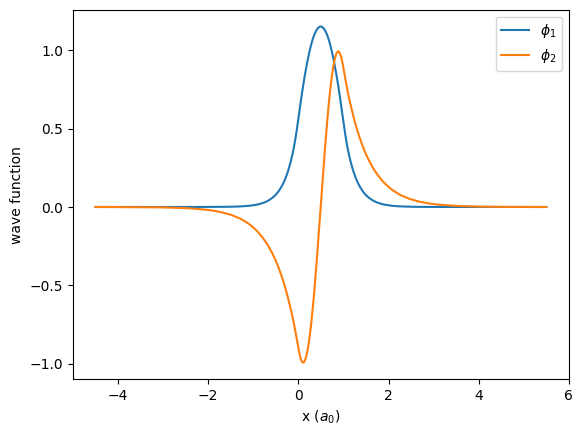

In [10]:
phi = np.einsum('ji,jk->ik', c, f)

plt.figure()
plt.plot(x, phi[0], label = r'$\phi_1$')
plt.plot(x, phi[1], label = r'$\phi_2$')
plt.ylabel('wave function')
plt.xlabel(r'x ($a_0$)')
plt.legend()
plt.show()

If you plot these approximate wave functions alongside the exact wave functions determined in a previous notebook, you will find that they are indistinguishable on the scale of this figure.